# Logistic Regression Models

In [26]:
import autorootcwd
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

### Performances

In [27]:
os.listdir(f'{DIR}/lr-search_cosine_1e-05/')

['train_metrics.json',
 'metadata.json',
 'val_metrics.json',
 'best_model.pth',
 'training_args.json',
 'test_metrics.json',
 'training_history.json']

In [28]:
rows = []
DIR = "./results_archive/logistic_lr_search"

for lr_scheduler in ['cosine', 'plateau', 'none']:
    for lr in [1e-05, 0.0001, 0.001, 0.01]:
        try:
            with open(f"{DIR}/lr-search_{lr_scheduler}_{lr}/val_metrics.json") as f:
                data = json.load(f)
                rows.append({
                    'lr_scheduler': lr_scheduler,
                    'lr': lr,
                    'accuracy': data['mean']['song_wise_acc'],
                    'root': data['mean']['root'],
                    'majmin': data['mean']['majmin'],
                    'third': data['mean']['third'],
                    'mirex': data['mean']['mirex'],
                })
        except:
            print(f"Failed to load {lr_scheduler} {lr}")
            pass

df = pd.DataFrame(rows)

In [29]:
df

,lr_scheduler,lr,accuracy,root,majmin,third,mirex
0,cosine,0.00001,0.043714,0.112932,0.070033,0.072458,0.119268
1,cosine,0.00010,0.273072,0.493698,0.389092,0.390656,0.459411
2,cosine,0.00100,0.397829,0.620383,0.542229,0.541970,0.615230
3,cosine,0.01000,0.416999,0.638019,0.562913,0.563797,0.649865
4,plateau,0.00001,0.090979,0.189489,0.130495,0.132214,0.193630
5,plateau,0.00010,0.313479,0.541707,0.444475,0.445903,0.520074
6,plateau,0.00100,0.416932,0.642881,0.567921,0.567504,0.607393
7,plateau,0.01000,0.407415,0.635006,0.563191,0.564211,0.623632
8,none,0.00001,0.090979,0.189489,0.130495,0.132214,0.193630
9,none,0.00010,0.313479,0.541707,0.444475,0.445903,0.520074


### Training Graphs

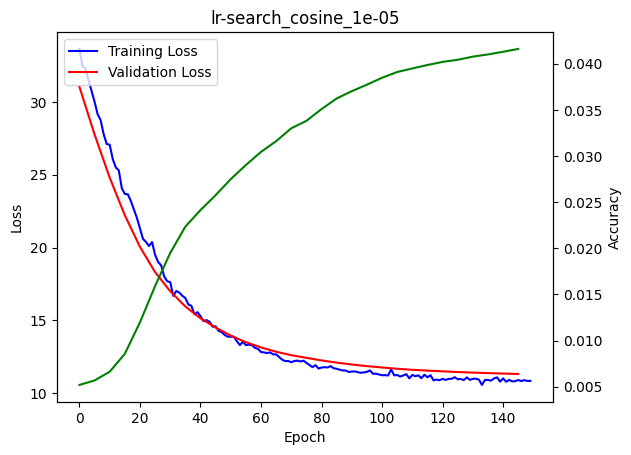

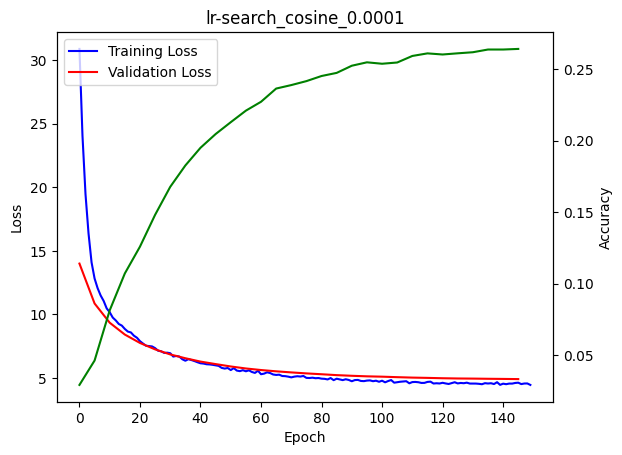

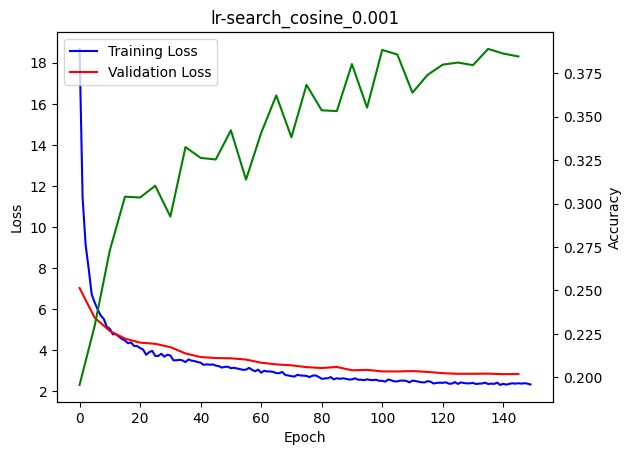

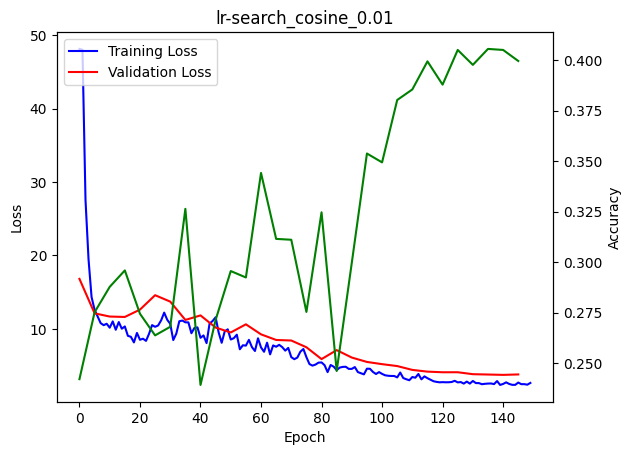

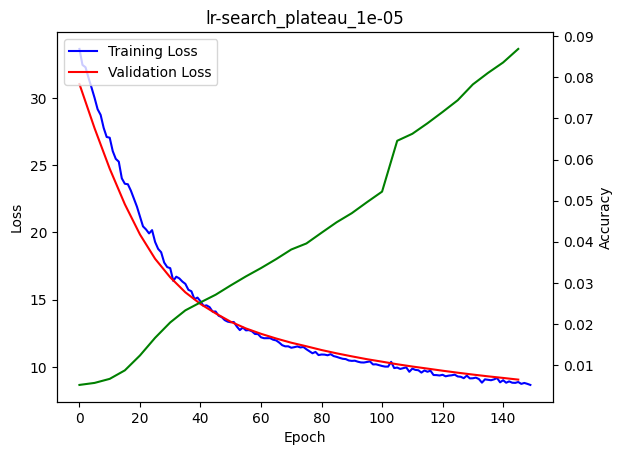

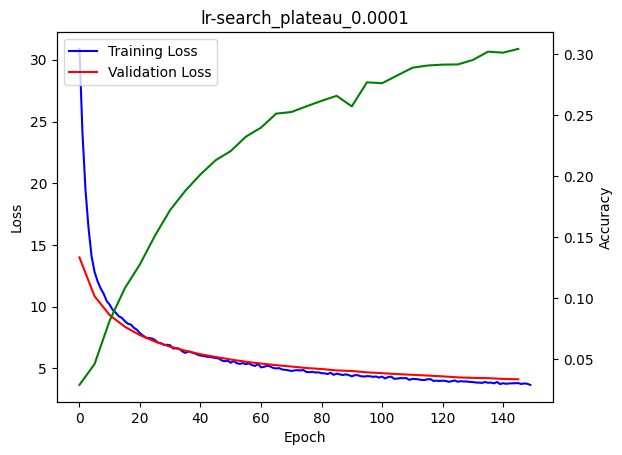

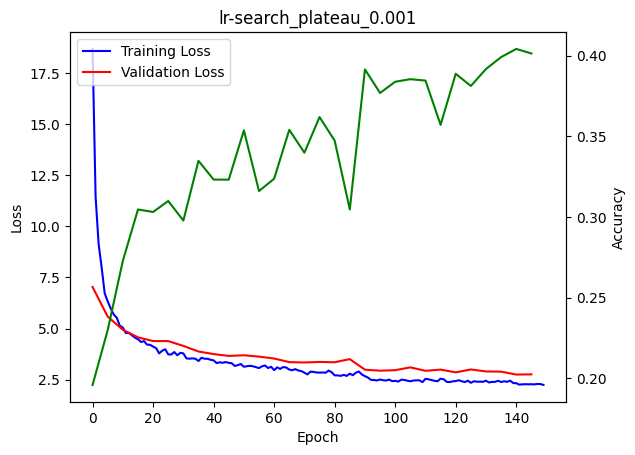

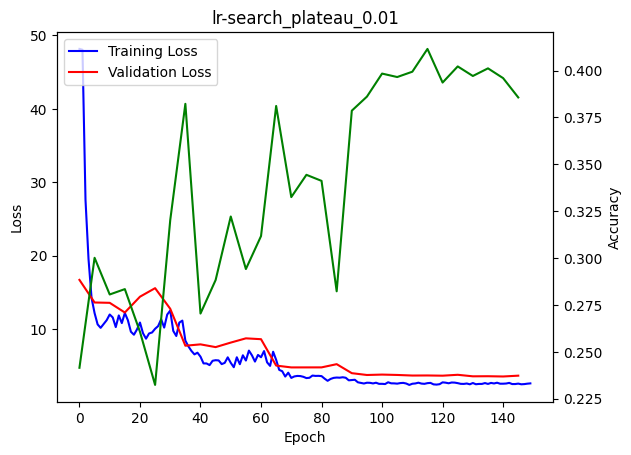

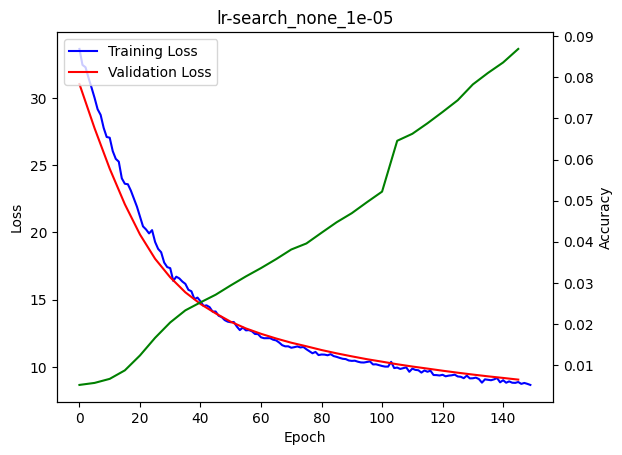

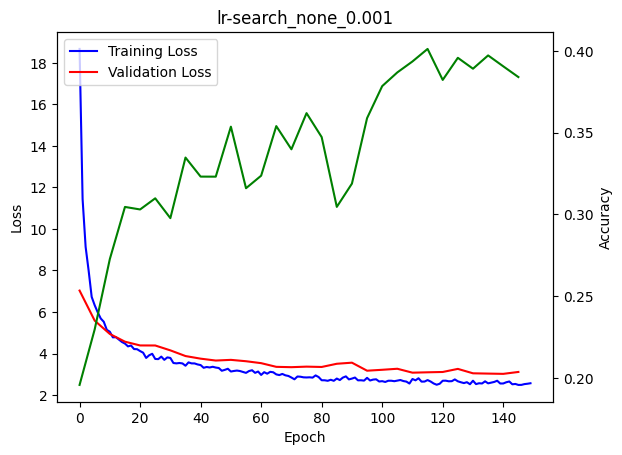

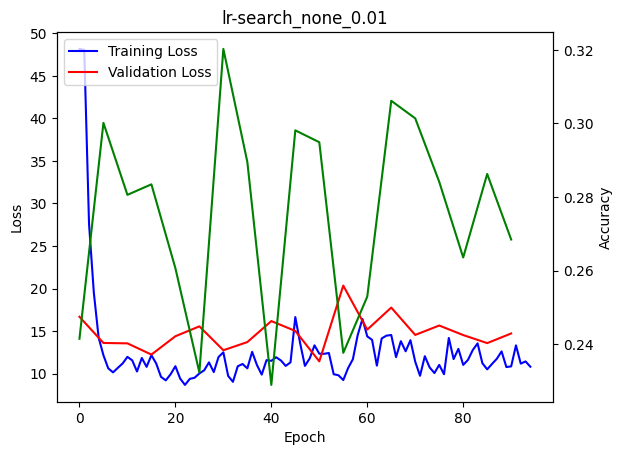

In [4]:
# Loop over directory of experiments
DIR = './results_archive/logistic_lr_search/'
experiments = os.listdir(DIR)
for lr_scheduler in ['cosine', 'plateau', 'none']:
    for lr in [1e-5, 0.0001, 0.001, 0.01]:
        if lr_scheduler == 'none' and lr == 0.0001:
            continue
        exp = f'lr-search_{lr_scheduler}_{lr}'
        training_history = json.load(open(f'{DIR}/{exp}/training_history.json'))
        train_losses = training_history['train_losses']
        val_losses = training_history['val_losses']
        val_accuracies = training_history['val_accuracies']
        # Plot all 3, with acc having its own y-axis
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(train_losses, label='Training Loss', color='blue')
        # Multiply validations by 5 as they were only recorded every 5 epochs
        ax1.plot([5 * i for i in range(len(val_losses))], val_losses, label='Validation Loss', color='red')
        ax2.plot([5 * i for i in range(len(val_accuracies))], val_accuracies, label='Validation Accuracy', color='green')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax2.set_ylabel('Accuracy')
        ax1.legend(loc='upper left')
        plt.title(f'{exp}')